In [1]:
import pyodbc
import yfinance as yf
import pandas as pd

# Verbindungsstring
conn_str = (
    r'Driver=SQL Server;'
    r'Server=.\SQLEXPRESS;'
    r'Database=studienprojekt;'
    r'Trusted_Connection=yes;'
)

# Verbindung zur Datenbank herstellen
cnxn = pyodbc.connect(conn_str)
cursor = cnxn.cursor()

# Tabelle prüfen
table_name = "stock_data"  # Name der Zieltabelle
start_date = "2016-01-01"  # Startdatum, ab dem Daten überprüft werden sollen
end_date = "2021-10-01"  # Enddatum, bis zu dem Daten überprüft werden sollen

# Daten aus der Tabelle in einen DataFrame laden
select_query = f"SELECT * FROM {table_name} WHERE timestamp >= ? AND timestamp <= ?"
df_existing_data = pd.read_sql(select_query, cnxn, params=(start_date, end_date))

# Verbindung schließen
cursor.close()
cnxn.close()

# DataFrame anzeigen
print(df_existing_data.head())

   id  timestamp       open       high        low      close     volume
0   1 2016-01-04  25.652500  26.342501  25.500000  26.337500  270597600
1   2 2016-01-05  26.437500  26.462500  25.602501  25.677500  223164000
2   3 2016-01-06  25.139999  25.592501  24.967501  25.174999  273829600
3   4 2016-01-07  24.670000  25.032499  24.107500  24.112499  324377600
4   5 2016-01-08  24.637501  24.777500  24.190001  24.240000  283192000


C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_2008\3196401638.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_existing_data = pd.read_sql(select_query, cnxn, params=(start_date, end_date))


In [8]:
import pyodbc
import yfinance as yf
import pandas as pd
from sqlalchemy import create_engine

# Verbindungsstring
conn_str = (
    r'Driver=SQL Server;'
    r'Server=.\SQLEXPRESS;'
    r'Database=studienprojekt;'
    r'Trusted_Connection=yes;'
)

# Verbindung zur Datenbank herstellen
cnxn = pyodbc.connect(conn_str)

# SQLAlchemy connectable erstellen
engine = create_engine('mssql+pyodbc://', creator=lambda: cnxn)

# Tabelle prüfen
table_name = "stock_data"  # Name der Zieltabelle
start_date = "2016-01-01"  # Startdatum, ab dem Daten überprüft werden sollen
end_date = "2023-06-01"  # Enddatum, bis zu dem Daten überprüft werden sollen

# Daten aus der Tabelle in einen DataFrame laden
select_query = f"SELECT * FROM {table_name} WHERE timestamp >= ? AND timestamp <= ?"
df = pd.read_sql(select_query, con=engine, params=(start_date, end_date))

# Verbindung schließen
cnxn.close()

# DataFrame anzeigen
print(df.head())


   id  timestamp       open       high        low      close     volume
0   1 2016-01-04  25.652500  26.342501  25.500000  26.337500  270597600
1   2 2016-01-05  26.437500  26.462500  25.602501  25.677500  223164000
2   3 2016-01-06  25.139999  25.592501  24.967501  25.174999  273829600
3   4 2016-01-07  24.670000  25.032499  24.107500  24.112499  324377600
4   5 2016-01-08  24.637501  24.777500  24.190001  24.240000  283192000


In [9]:
print(df.head())
print(df.info())


   id  timestamp       open       high        low      close     volume
0   1 2016-01-04  25.652500  26.342501  25.500000  26.337500  270597600
1   2 2016-01-05  26.437500  26.462500  25.602501  25.677500  223164000
2   3 2016-01-06  25.139999  25.592501  24.967501  25.174999  273829600
3   4 2016-01-07  24.670000  25.032499  24.107500  24.112499  324377600
4   5 2016-01-08  24.637501  24.777500  24.190001  24.240000  283192000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1866 non-null   int64         
 1   timestamp  1866 non-null   datetime64[ns]
 2   open       1866 non-null   float64       
 3   high       1866 non-null   float64       
 4   low        1866 non-null   float64       
 5   close      1866 non-null   float64       
 6   volume     1866 non-null   int64         
dtypes: datetime64[ns](1), float64(4), 

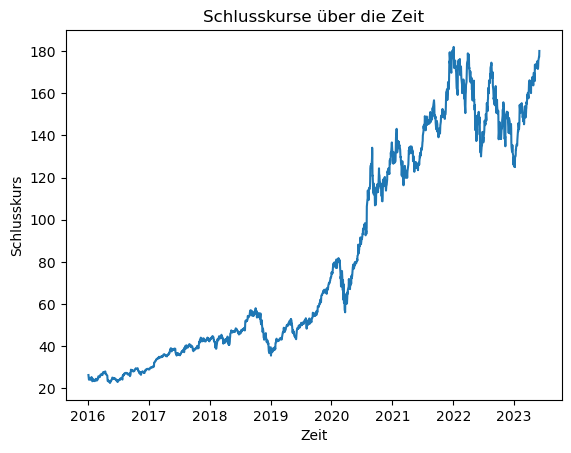

In [16]:
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['close'])
plt.xlabel('Zeit')
plt.ylabel('Schlusskurs')
plt.title('Schlusskurse über die Zeit')
plt.show()


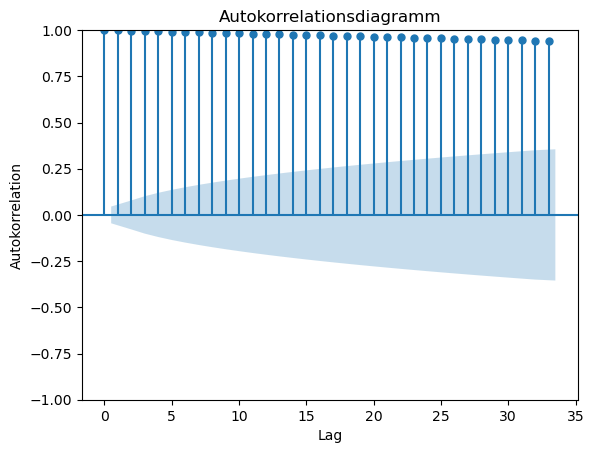

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['close'])
plt.xlabel('Lag')
plt.ylabel('Autokorrelation')
plt.title('Autokorrelationsdiagramm')
plt.show()


In [21]:
import pmdarima as pm

# Modellordnung mit pmdarima bestimmen
model = pm.auto_arima(df['close'], seasonal=False, trace=True)

# Beste Modellordnung ausgeben
print(model.order)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7711.161, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7711.196, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7708.131, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7707.761, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7712.666, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7707.295, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7711.694, Time=0.95 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7709.025, Time=0.97 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7707.593, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7707.994, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7709.589, Time=0.27 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 5.257 seconds
(1, 1, 1)


In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Daten vorbereiten (falls erforderlich)
# ...

# Modellordnung festlegen
p = 1  # Grad der autoregressiven Komponente
d = 1  # Ordnung der Integration
q = 1  # Grad der Moving-Average-Komponente

# ARIMA-Modell erstellen
model = ARIMA(df['close'], order=(1, 1, 1))

# Modell anpassen
model_fit = model.fit()

# Modellzusammenfassung anzeigen
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1866
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3851.795
Date:                Wed, 21 Jun 2023   AIC                           7709.589
Time:                        23:24:43   BIC                           7726.182
Sample:                             0   HQIC                          7715.703
                               - 1866                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4213      0.190      2.219      0.026       0.049       0.793
ma.L1         -0.4773      0.186     -2.572      0.010      -0.841      -0.114
sigma2         3.6427      0.063     58.269      0.0

In [25]:
# Vorhersagen machen
n_periods = 10  # Anzahl der Vorhersageschritte
forecast, stderr, conf_int = model_fit.forecast(steps=n_periods)

# Ergebnisse anzeigen
print("Vorhersagen:")
print(forecast)


ValueError: too many values to unpack (expected 3)

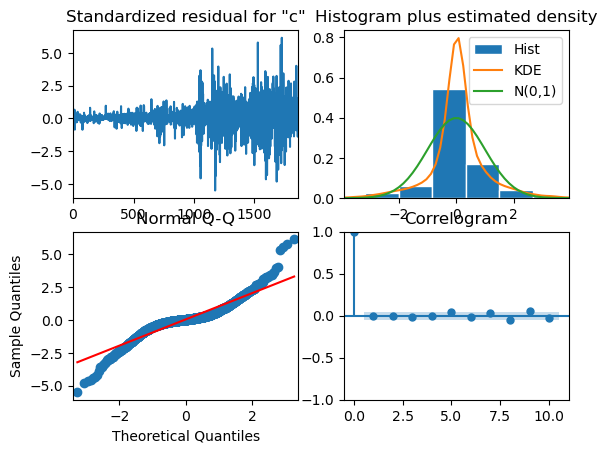

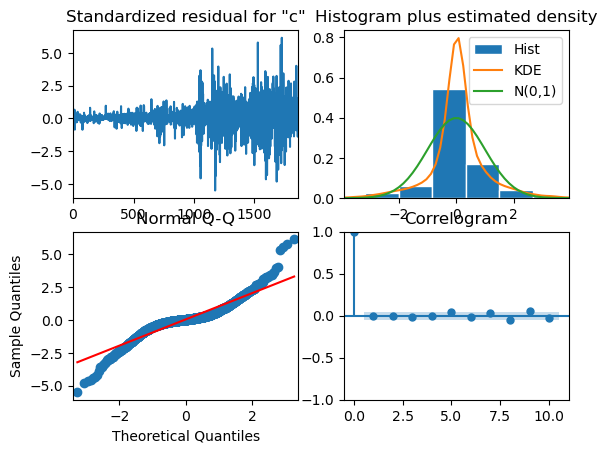

In [26]:
model_fit.plot_diagnostics()

In [27]:
# Testdaten laden (annimahme: df_test ist ein DataFrame mit Testdaten)
# ...

# Vorhersagen machen
forecast = model_fit.predict(start=len(df), end=len(df) + len(df_test) - 1)

# Fehlermaße berechnen
mse = mean_squared_error(df_test['close'], forecast)
mae = mean_absolute_error(df_test['close'], forecast)

# Fehlermaße anzeigen
print("MSE:", mse)
print("MAE:", mae)


NameError: name 'df_test' is not defined

In [29]:
# Daten aufteilen
train_size = int(len(df) * 0.8)  # 80% der Daten für das Training verwenden
train_data = df[:train_size]
valid_data = df[train_size:]

# ARIMA-Modell erstellen und anpassen
model = ARIMA(train_data['close'], order=(1, 1, 1))
model_fit = model.fit()

# Vorhersagen für das Validierungsset machen
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(valid_data) - 1)

# Validierungsdaten und Vorhersagen anzeigen
valid_data['forecast'] = forecast
print(valid_data[['close', 'forecast']])


           close    forecast
1492  165.320007  161.995731
1493  171.179993  161.929655
1494  175.080002  161.957690
1495  174.559998  161.945795
1496  179.449997  161.950842
...          ...         ...
1861  172.990005  161.949338
1862  175.429993  161.949338
1863  177.300003  161.949338
1864  177.250000  161.949338
1865  180.089996  161.949338

[374 rows x 2 columns]


C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_2008\1604298369.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['forecast'] = forecast


In [30]:
# Vorhersagen für das Validierungsset machen
valid_data.loc[:, 'forecast'] = forecast

# Validierungsdaten und Vorhersagen anzeigen
print(valid_data[['close', 'forecast']])


           close    forecast
1492  165.320007  161.995731
1493  171.179993  161.929655
1494  175.080002  161.957690
1495  174.559998  161.945795
1496  179.449997  161.950842
...          ...         ...
1861  172.990005  161.949338
1862  175.429993  161.949338
1863  177.300003  161.949338
1864  177.250000  161.949338
1865  180.089996  161.949338

[374 rows x 2 columns]


C:\Users\HerbyHerb\AppData\Local\Temp\ipykernel_2008\4071388012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data.loc[:, 'forecast'] = forecast
